In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

O objetivo desta atividade é mostrar que os erros sistemáticos podem ser tratados como fontes de erro
covariantes entre os dados.

1) Suponha duas medições (𝑥 e 𝑦 ) sujeitas a erros de calibração com desvio-padrão 𝜎𝐶 e a erros(aleatórios) de leitura de desvio-padrão 𝜎𝐿, de modo que as incertezas são 𝜎𝑥 = 𝜎𝑦 = √(𝜎𝐶)2 + (𝜎𝐿)2 . \

No caso em que as duas medições estejam sujeitas ao mesmo erro de calibração (por exemplo, se osvalores forem similares e as medições tiverem sido feitas com o mesmo aparelho), o erro devido àcalibração será um erro sistemático, pois afeta os dados 𝑥 e 𝑦 da mesma fora e, portanto, a covariânciaserá 𝑐𝑜𝑣(𝑥, 𝑦) = 〈𝜀𝑥𝜀𝑦〉 = 〈(𝜀𝐿𝑥 + 𝜀𝐶)(𝜀𝐿𝑦 + 𝜀𝐶)〉 = (𝜎𝐶)2, pois o valor esperado dos termos cruzadosenvolvendo os erros de leitura com o erro de calibração ou erros de leitura diferentes são nulos.
Considerando que os erros sejam gaussianos, a geração dos dados 𝑥 e 𝑦 pode ser feita a partir de 3números aleatórios gaussianos de valor esperado 0 e desvio-padrão verdadeiro 1 (𝑟𝐶, 𝑟𝑥 e 𝑟𝑦) por: \

$𝜀𝐶 = 𝜎𝐶 ∗ 𝑟𝐶$ \
$𝑥 = 𝑥0 + 𝜎𝐿 ∗ 𝑟𝑥 + 𝜀𝐶$ \
$𝑦 = 𝑦0 + 𝜎𝐿 ∗ 𝑟𝑦 + 𝜀𝐶$ \

Considere o caso em que os valores verdadeiros sejam 𝑥0 = 110 e 𝑦0 = 100 e as incertezasassociadas aos erros de calibração e de leitura sejam, respectivamente, 𝜎𝐶 = 4 e 𝜎𝐿 = 3. Gere umconjunto de 𝑵 = 𝟏. 𝟎𝟎𝟎 pares de dados com as características dos erros propostos e faça um gráfico dedispersão dos pontos.

In [40]:
def funcao(x0, y0, σl, σc, N):
    M = np.zeros((N,2))
    for i in range(len(M)):
        rx, ry, rc = np.random.randn(), np.random.randn(), np.random.randn()
        M[i] =  [x0 + σl*rx + σc * rc, y0 + σl*ry + σc * rc  ] 
    return M

In [41]:
x0, y0, σl, σc, N = 110, 100, 4, 3, 1000
M = funcao(x0, y0, σl, σc, N)

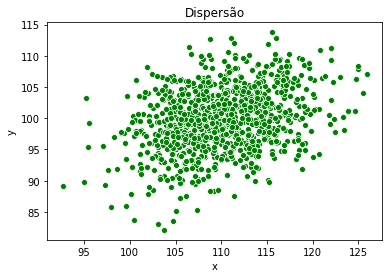

In [44]:
sns.scatterplot(x=M[:,0], y=M[:,1], color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dispersão')
#plt.savefig('TEFE19/figurarho{}.png'.format(ρ), dpi=250)
plt.show()

a) Determine a frequência relativa com que os erros de 𝑥 e 𝑦 têm o mesmo sinal e, usando seus
conhecimentos sobre a binomial, estime a incerteza dessa frequência relativa.

In [54]:
n_vezes = np.sum((M[:,0] >= x0) & (M[:,1] >= y0) | (M[:,0] < x0) & (M[:,1] < y0))
σ_n_v = np.sqrt(n_vezes*(1 - n_vezes/N))
print('A quatidade de vezes que x e y tem o mesmo sinal {} +/- {:.0f}.'.format(n_vezes, σ_n_v))

A quatidade de vezes que x e y tem o mesmo sinal 604 +/- 15.


b) Calcule a covariância amostral, 𝑉𝑥𝑦, e a correspondente correlação amostral, 𝑅, dos 𝑁 pares de
valores de 𝑥 e 𝑦 gerados. Use as expressões fornecidas na Nota 2 abaixo para estimar as incertezas de
𝑉𝑥𝑦 e �

In [55]:
def somatoria_dupla(M, am, bm):
    val = 0
    for i in range(len(M[:,0])):
        val += (M[i,0] - am) * (M[i,1] - bm)
    return val/(N-1)

In [56]:
xm, ym = np.mean(M[:,0]), np.mean(M[:,1])
Vxy = somatoria_dupla(M, xm, ym)

σx, σy = np.std(M[:,0], ddof=1), np.std(M[:,1], ddof=1)
R = Vxy/(σx * σy)

σVxy = σx*σy*np.sqrt((1 + R**2) / (N-1))
σR = (1 - R**2)/np.sqrt(N-1)

print('Vxy = {:.2f} +/- {:.2f}\n====================\nR = {:.2f} +/- {:.2f}.'.format(Vxy, σVxy, R, σR))

Vxy = 8.53 +/- 0.86
R = 0.33 +/- 0.03.


c) Para cada um dos 𝑁 pares de valores de 𝒙 e 𝒚, calcule a soma correspondente, 𝑤 = 𝑥 + 𝑦.
Determine o desvio-padrão amostral de 𝒘 (a incerteza de cada valor de 𝒘). \
Nota: A incerteza do desvio-padrão amostral pode ser estimada por 𝑖𝑛𝑐𝑠 ≅𝑠√2(𝑁−1)


In [57]:
W = np.add(M[:,0], M[:,1])
Wm = np.mean(W)
σW = np.std(W, ddof=1)
sσ = σW/np.sqrt(2*(N-1))
print( 'σW = {:.2f} +/- {:.2f}.'.format(σW, sσ))

σW = 8.31 +/- 0.19.


d) Repita o item anterior para o caso da diferença entre 𝒙 e 𝒚, 𝑧 = 𝑥 − 𝑦.

In [58]:
Z = np.add(M[:,0], np.multiply(-1, M[:,1]))
Zm = np.mean(Z)
σZ = np.std(Z, ddof=1)
sσ = σZ/np.sqrt(2*(N-1))
print( 'σZ = {:.2f} +/- {:.2f}.'.format(σZ, sσ))

σZ = 5.91 +/- 0.13.


e) Calcule, usando a Lei Geral de Propagação de Incertezas, os valores esperados para as incertezas
de 𝒘 e de 𝒛 e compare-as com as estimativas obtidas numericamente nos itens c e d.

ANALITICAMENTE

2) Considere agora o caso de várias medições sujeitas a erros sistemáticos, 𝜀𝑆
(igual para todos os dados),e aleatórios, 𝜀𝐴 (que diferem de dado para dado):𝑑𝑖 = 𝑑0 + 𝜀𝑆 + 𝜀𝐴𝑖onde 𝑑0 = 200 é o valor verdadeiro da grandeza. Suponha que os erros sistemáticos sejam gaussianos etenham desvio-padrão 𝜎𝑆 = 4 e os aleatórios também sejam gaussianos com desvio-padrão 𝜎𝐴 = 3. Gere𝑴 = 𝟏𝟎. 𝟎𝟎𝟎 conjuntos de 𝑵 = 𝟐𝟓 dados com essas características (para cada conjunto é preciso gerarum valor de erro sistemático e 𝑁 valores de erros aleatórios) e registre os 𝑀 valores médios de cadaconjunto. \

Estime numericamente a incerteza dos valores médios dos 𝑁 dados, 𝑠𝑑𝑚(estimada pelo desviopadrão amostral dos 𝑀 valores médios de 𝑑). Estime a incerteza de 𝑠𝑑𝑚por𝑠𝑑𝑚√2(𝑀−1).

In [59]:
def funcao_2(d0, σs, σa):
    M = np.zeros((N,1))
    ϵs = σs * np.random.randn()
    for i in range(len(M)):
        
        rx, ry, rc = np.random.randn(), np.random.randn(), np.random.randn()
        M[i] =  d0 + ϵs + σs*np.random.randn()
    return M

In [ ]:
d0, σs, σa = 200, 4, 3